``Project 2. v.4``

# Влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике

In [1]:
# Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_init = pd.read_csv('stud_math.csv')
stud = stud_init.copy()

In [2]:
%matplotlib inline

# 1. Первичный отсмотр данных

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [3]:
display(stud.head(10))
stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Описание датасета Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике



In [4]:
# Проверяем, соответствует ли описание реальности, да соответствует
for col in stud.columns.to_series():
    print(col)
    display(stud[col].value_counts())
    print('☟ ☟ ☟ ☟ ☟ ')

school


GP    349
MS     46
Name: school, dtype: int64

☟ ☟ ☟ ☟ ☟ 
sex


F    208
M    187
Name: sex, dtype: int64

☟ ☟ ☟ ☟ ☟ 
age


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

☟ ☟ ☟ ☟ ☟ 
address


U    295
R     83
Name: address, dtype: int64

☟ ☟ ☟ ☟ ☟ 
famsize


GT3    261
LE3    107
Name: famsize, dtype: int64

☟ ☟ ☟ ☟ ☟ 
Pstatus


T    314
A     36
Name: Pstatus, dtype: int64

☟ ☟ ☟ ☟ ☟ 
Medu


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

☟ ☟ ☟ ☟ ☟ 
Fedu


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

☟ ☟ ☟ ☟ ☟ 
Mjob


other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

☟ ☟ ☟ ☟ ☟ 
Fjob


other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

☟ ☟ ☟ ☟ ☟ 
reason


course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

☟ ☟ ☟ ☟ ☟ 
guardian


mother    250
father     86
other      28
Name: guardian, dtype: int64

☟ ☟ ☟ ☟ ☟ 
traveltime


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

☟ ☟ ☟ ☟ ☟ 
studytime


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

☟ ☟ ☟ ☟ ☟ 
failures


0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

☟ ☟ ☟ ☟ ☟ 
schoolsup


no     335
yes     51
Name: schoolsup, dtype: int64

☟ ☟ ☟ ☟ ☟ 
famsup


yes    219
no     137
Name: famsup, dtype: int64

☟ ☟ ☟ ☟ ☟ 
paid


no     200
yes    155
Name: paid, dtype: int64

☟ ☟ ☟ ☟ ☟ 
activities


yes    195
no     186
Name: activities, dtype: int64

☟ ☟ ☟ ☟ ☟ 
nursery


yes    300
no      79
Name: nursery, dtype: int64

☟ ☟ ☟ ☟ ☟ 
studytime, granular


-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

☟ ☟ ☟ ☟ ☟ 
higher


yes    356
no      19
Name: higher, dtype: int64

☟ ☟ ☟ ☟ ☟ 
internet


yes    305
no      56
Name: internet, dtype: int64

☟ ☟ ☟ ☟ ☟ 
romantic


no     240
yes    124
Name: romantic, dtype: int64

☟ ☟ ☟ ☟ ☟ 
famrel


 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

☟ ☟ ☟ ☟ ☟ 
freetime


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

☟ ☟ ☟ ☟ ☟ 
goout


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

☟ ☟ ☟ ☟ ☟ 
health


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

☟ ☟ ☟ ☟ ☟ 
absences


0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

☟ ☟ ☟ ☟ ☟ 
score


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

☟ ☟ ☟ ☟ ☟ 


# 2. Первичный анализ данных в столбцах.
Для удобства использования pandas переименуем все столбцы (применим только строчные буквы и уберем пробелы):

In [5]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [6]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 
                 'parents_status', 'mother_edu', 'father_edu', 
                'mother_job', 'father_job', 'choice_reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                 'studytime_granular', 'higher', 'internet', 'romantic', 'fam_rel',
                'freetime', 'go_out', 'health', 'absences', 'score']

In [7]:
# Проверяем таблицу
stud
# Наименования столбцов корректные

,school,sex,age,address,famsize,parents_status,mother_edu,father_edu,mother_job,father_job,choice_reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


## Пропущенные значения
Узнаем сколько их. Методы isna(), sum()



In [8]:
stud.isna().sum()

school                 0
sex                    0
age                    0
address               17
famsize               27
parents_status        45
mother_edu             3
father_edu            24
mother_job            19
father_job            36
choice_reason         17
guardian              31
traveltime            28
studytime              7
failures              22
schoolsup              9
famsup                39
paid                  40
activities            14
nursery               16
studytime_granular     7
higher                20
internet              34
romantic              31
fam_rel               27
freetime              11
go_out                 8
health                15
absences              12
score                  6
dtype: int64

In [9]:
missing_values_max = stud.isna().sum().max()
print('Максимальное число пропущенных значений в столбце - {}'.format(round((missing_values_max / len(stud) * 100), 1)),'%')

Максимальное число пропущенных значений в столбце - 11.4 %


In [10]:
missing_values_mean = stud.isna().sum().mean()
print('Среднее число пропущенных значений в столбце - {}'.format(round((missing_values_mean / len(stud) * 100), 1)),'%')

Среднее число пропущенных значений в столбце - 4.8 %


**Вывод**. Пустых значений в столбцах - от 0% (минимум) до 11% (максимум), в среднем - 4,8%

In [11]:
import missingno

<AxesSubplot:>

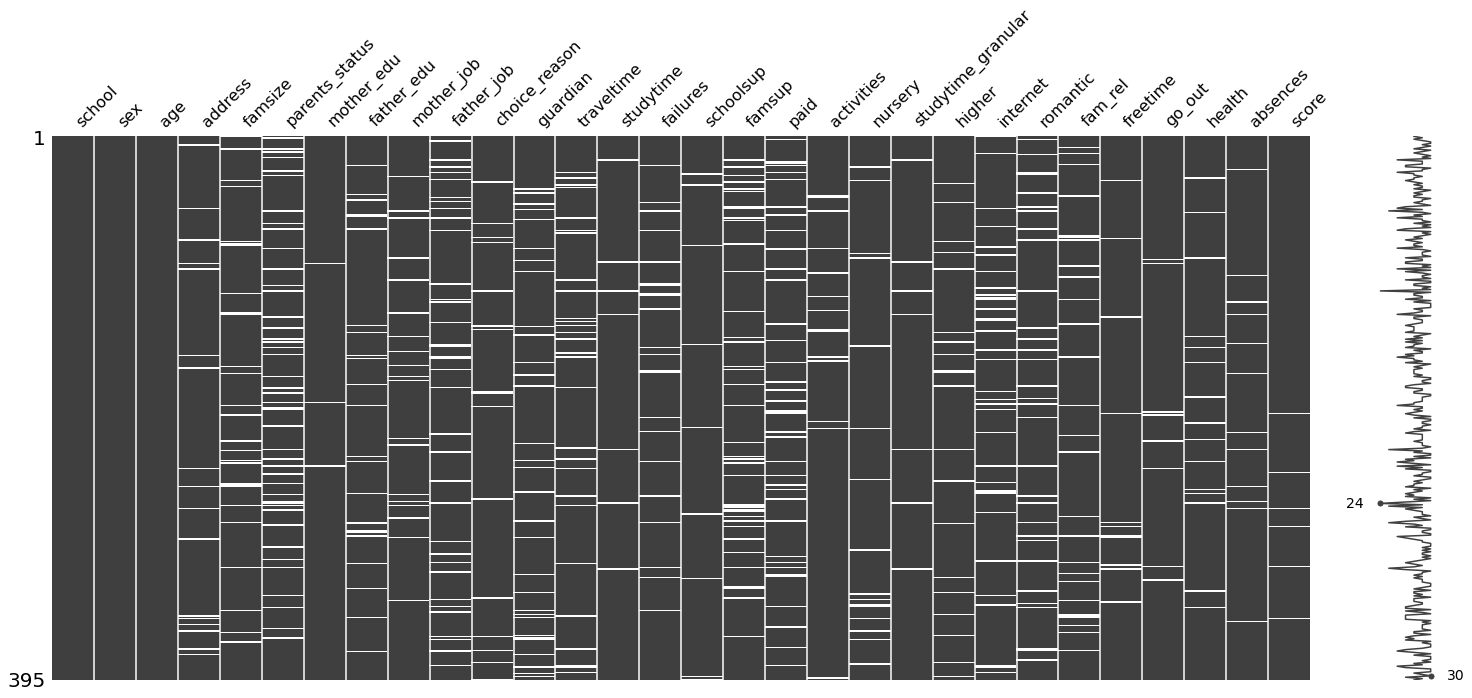

In [12]:
missingno.matrix(stud)

## Сгруппируем 30 столбцов по типу переменных: 
- количественные (численные) принимают измеренные значения некоторого признака
    - непрерывные (принимают абсолютно любые значение, например, длина чего-то)
    - дискретные (принимают только определенные значения, вшем датасете - absences, age, score)
    
- качественные используются для разделения наблюдений на группы 

*В этом случае цифры не имеют никакого математического смысла. Цифры являются лишь маркерами (именами) каких-то групп.
Бессмысленно подвергать их арифметичсеким операциям.*

- ранговые переменные (частный случай качественных)

Можно сказать, что испытуемый с рангом 1 выше / быстрее / сильнее испытуемого с рангом 2, но неизвестно во сколько раз или на сколько.
Единственная возможная операция - сравнение.

- бинарные признаки являются частным случаем качественных признаков, представляют собой частные признаки с двумя градациями, например: «нет» — 0, «да» — 1.



- ***Численные переменные (количественные)*** - 3: 
    - age, 
    - absences, 
    - score - целевая переменная  

- ***Качественные переменные - бинарные*** - 12: 
    - school
    - sex, 
    - address, 
    - famsize, 
    - parents_status, 
    - schoolsup, 
    - famsup, 
    - paid, 
    - activities, 
    - nursery, 
    - higher, 
    - internet, 
    - romantic   

- ***Остальные качественные переменные (оценочные)***  - 13: 
    - mother_edu   
    - father_edu      
    - mother_job 
    - father_job     
    - reason, 
    - guardian, 
    - traveltime, 
    - studytime, 
    - failures, 
    - fam_rel, 
    - freetime, 
    - go_out, 
    - health  
    - studytime_granular  

**Всего 30 столбцов**  

***Целевой переменной для нас является score***

Мне показалась непонятной переменная ***failures — количество внеучебных неудач***, (n, если 1<=n<=3, иначе 0), которая не имеет четкого определения и может включать в себя также неудовлетворенность статусом родителей, отношениями в семье, в романтических отношениях, с друзьями, со здоровьем, нехватку денег для получения страстно желаемого высшего образования, и даже недовольство от жизни в глухой деревне или от длительной тряски в электричке по пути в школу. В свете современных тенденций ученик может даже считать внеучебной неудачей свой биологический пол. Эти данные уже имеются в датасете в соответствующих столбцах, к одному и тому же критерию два разных подростка могут иметь совершенно диаметральное отношение. Переменная failures может оказаться собирательным фактором, интересно, как ее подсчитывали? 

Взглянем на нее: из гистограммы видно, что подавляющее большинство учащихся всё-таки не депрессивные "самоеды", а нормальные подростки, полные юношеского оптимизма. 

<AxesSubplot:>

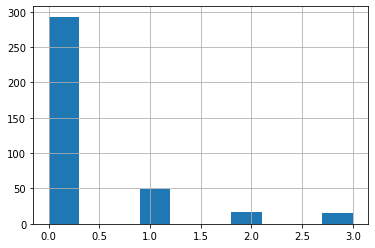

In [13]:
stud_init['failures'].hist()

Столбец **'studytime_granular'** - отсутствует в описании и визуально прослеживается корреляция со столбцом studytime. По сути, все значения studytime_granular - это значения studytime, умноженные на "-3". Поэтому избавимся от ненужного нам столбца studytime_granular

In [14]:
stud.loc[:,['studytime','studytime_granular']]

,studytime,studytime_granular
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


In [15]:
# Удаляем столбец studytime_granular
stud.drop(['studytime_granular'], inplace = True, axis = 1)

In [16]:
# Проверяем датафрейм
stud

,school,sex,age,address,famsize,parents_status,mother_edu,father_edu,mother_job,father_job,choice_reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


# 3. Предобработка


In [17]:
# Определим функцию isNaN_column() для подсчета количества уникальных и пустых значений в столбце и замены пустых на None

def isNaN(num):
    return num != num


def isNaN_column(col):
    empty = len(col) - isNaN(col).value_counts()[False]
    print(' В столбце {}'.format(empty), 'пустых значений и {} уникальных'.format(len(col.value_counts())))
    #col = col.apply(lambda x: None if isNaN(x) else None if x == 'nan' else x)
    display(col.sort_values().unique(), col.sort_values().value_counts())
    return col
# col = col.astype(str).apply(lambda x: None if x.strip() == '' else x)

In [18]:
# Определим функцию outliers_column() для проверки наличия выбросов в столбце и вывода некоторых стат. данных столбца

def outliers_column(col):
    
    empty = len(col) - isNaN(col).value_counts()[False]
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    IQR = perc75 - perc25
    left = perc25 - 1.5*IQR
    right = perc75 + 1.5*IQR
    
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), 'IQR: {}, '.format(IQR),
          'Границы выбросов: [{l}, {r}]'.format(l=left, r=right),
          'Количество выбросов: {}.'.format(len(col) - len(col.loc[col.between(left, right)])-empty))

**Категориальные переменные вряд ли могут быть выбросами. Будем идентифицировать выбросы только для числовых атрибутов: age, absences, score**, а в категориальных переменных при необходимости - лишь исправим имеющиеся ошибки ввода, результат "человеческого фактора"

# 4. Теперь рассмотрим все 30 столбцов по отдельности

- К каждому столбцу применим функцию **isNaN_column()** для подсчета уникальных и пустых значений в столбце и замены пустых на None
- Для количественных столбцов **построим гистограммы** и **уберем выбросы**
- Для порядковых построим графики **boxplot** и посчитаем **квантили**. Посчитаем **выбросы** и посмотрим в каждом отдельном случае, исходя из здравого смысла, стоит ли их убирать
- Для категориальных примененим функцию **isNaN_column()**


## Рассмотрим столбцы с количественным типом данных



# ``Целевая переменная score``
баллы по госэкзамену по математике¶

<AxesSubplot:>

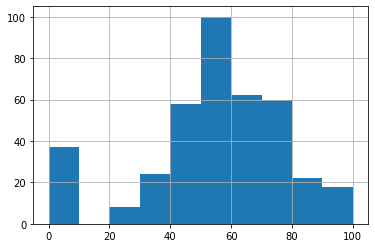

In [19]:
stud.score.hist()

<AxesSubplot:>

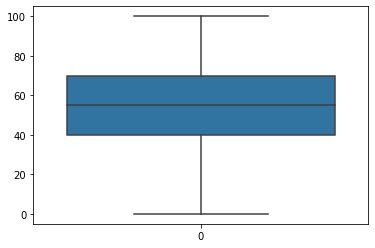

In [20]:
# Распределение значений было бы нормальным, если бы не большое значение нулевых оценок, которое торчит столбом слева
# Построим ящик с усами чтобы проверить на наличие выбросов
sns.boxplot(data=stud.score)

 В столбце 6 пустых значений и 18 уникальных


array([  0.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,
        70.,  75.,  80.,  85.,  90.,  95., 100.,  nan])

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0] Количество выбросов: 0.


C:\Users\mailf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


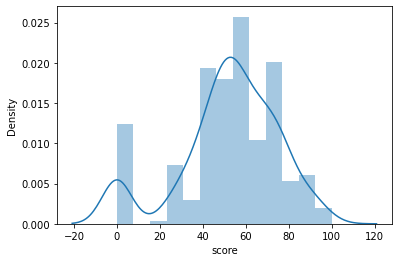

In [21]:
stud.score = isNaN_column(stud.score)
sns.distplot(stud.score)
outliers_column(stud.score)

In [22]:
# сохраним строки с пустым score, на случай, если вдруг они понадобятся позже
# в основном датасете удаляем эти строки
stud_empty_score = stud[stud.score.isna()]

stud = stud[stud.score.isna() == False]

In [23]:
# Проверяем пустые значения
stud.score.isna().sum()

0

In [24]:
# проверяем размеры датасета
stud.shape

(389, 29)

In [25]:
#Значения колонки score
pd.DataFrame(stud.score.value_counts()).index

Float64Index([ 50.0,  55.0,   0.0,  75.0,  65.0,  40.0,  60.0,  70.0,  45.0,
               80.0,  30.0,  90.0,  35.0,  25.0,  85.0,  95.0, 100.0,  20.0],
             dtype='float64')

Оказалось, что нулевые значения переменной score не являются выбросами. 

Однако, нулевое значение может не зависеть от рассматриваемых факторов, а быть причиной того, что ученик разволновался, опоздал или не смог прийти на экзамен. А оценка 100 является, скорее, исключением.

Поэтому я предлагаю избавиться от крайних значений. 

Еще можно было бы применить метод "винзурированное среднее", когда крайние значения не выбрасываются, а приравниваются предыдущему значению.

<AxesSubplot:xlabel='score'>

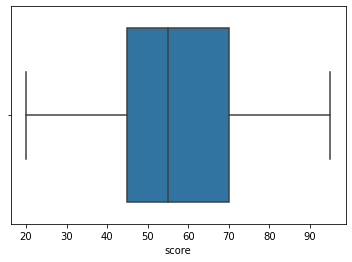

In [26]:
minPercentile = 2
maxPercentile = 98

stud = stud.loc[stud.score.between(minPercentile, maxPercentile) | isNaN(stud.score)]
#sns.distplot(stud.score)
sns.boxplot(x='score', data = stud)

C:\Users\mailf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

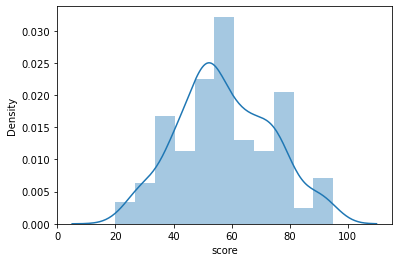

In [27]:
sns.distplot(stud.score)

# ``age`` 
Количественный признак без пропусков, 8 уникальных значений

In [28]:
stud.age = isNaN_column(stud.age)

 В столбце 0 пустых значений и 8 уникальных


array([15, 16, 17, 18, 19, 20, 21, 22], dtype=int64)

16    95
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0] Количество выбросов: 1.


C:\Users\mailf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


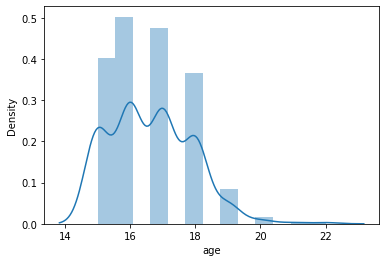

In [29]:
# Строим гистограмму
sns.distplot(stud.age)
stud.age.describe()
# Проверяем на выбросы
outliers_column(stud.age)

Видим 1 выброс, оставляем его, так как наш анализ называется "Влияние условий жизни учащихся в возрасте от 15 до 22", то есть он как бы и не выброс совсем, а условие задачи.

In [30]:
stud.age = isNaN_column(stud.age)

 В столбце 0 пустых значений и 8 уникальных


array([15, 16, 17, 18, 19, 20, 21, 22], dtype=int64)

16    95
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

# ``absences``
количество пропущенных занятий

In [31]:
stud.absences = isNaN_column(stud.absences)

 В столбце 10 пустых значений и 36 уникальных


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  28.,  30.,  38.,  40.,  54.,  56.,
        75., 212., 385.,  nan])

0.0      74
2.0      60
4.0      51
6.0      30
8.0      20
10.0     17
14.0     12
12.0     12
16.0      7
3.0       7
7.0       6
5.0       5
18.0      5
20.0      4
22.0      3
1.0       3
9.0       3
15.0      2
11.0      2
13.0      2
385.0     1
212.0     1
19.0      1
21.0      1
23.0      1
24.0      1
25.0      1
26.0      1
28.0      1
30.0      1
38.0      1
40.0      1
54.0      1
56.0      1
75.0      1
17.0      1
Name: absences, dtype: int64

In [32]:
# Проверяем имеет ли смысл оставлять строку absences == 212.0
stud[stud.absences == 212.0]
# Сохраняем строку, так как ученик получил оценку 45 баллов, может, он на удалёнке учился

,school,sex,age,address,famsize,parents_status,mother_edu,father_edu,mother_job,father_job,choice_reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


In [33]:
# Проверяем имеет ли смысл оставлять строку absences == 385.0 
stud[stud.absences == 385.0]
# Ученик получил шикарную оценку 85 баллов, поэтому заменим явно ошибочное значение absenses на медианное

,school,sex,age,address,famsize,parents_status,mother_edu,father_edu,mother_job,father_job,choice_reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0


In [34]:
stud.absences = stud.absences.replace(385.0, stud.absences.median())

In [35]:
# Проверяем 
stud[stud.index == 222]

,school,sex,age,address,famsize,parents_status,mother_edu,father_edu,mother_job,father_job,choice_reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,yes,yes,no,2.0,3.0,1.0,3.0,4.0,85.0


In [36]:
outliers_column(stud.absences)

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0] Количество выбросов: 26.


In [37]:
# заполняем пробелы новым значением, выбросы не трогаем
stud.absences = stud.absences.fillna(stud.absences.median())

C:\Users\mailf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='absences', ylabel='Density'>

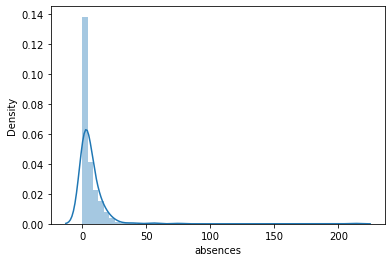

In [38]:
sns.distplot(stud.absences)

In [39]:
# проверяем пустые строки
stud.absences = isNaN_column(stud.absences)

 В столбце 0 пустых значений и 35 уникальных


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  28.,  30.,  38.,  40.,  54.,  56.,
        75., 212.])

0.0      74
4.0      62
2.0      60
6.0      30
8.0      20
10.0     17
14.0     12
12.0     12
16.0      7
3.0       7
7.0       6
5.0       5
18.0      5
20.0      4
9.0       3
22.0      3
1.0       3
11.0      2
13.0      2
15.0      2
212.0     1
75.0      1
19.0      1
21.0      1
23.0      1
24.0      1
25.0      1
26.0      1
28.0      1
30.0      1
38.0      1
40.0      1
54.0      1
56.0      1
17.0      1
Name: absences, dtype: int64




## Рассмотрим столбцы с бинарным типом данных

Которые в процессе обработки иногда могут перестать быть бинарными и превратиться просто в качественные переменные в результате добавления нового признака


Посмотрим, сколько школ содержит наш датасет.

# ``school ``
 аббревиатура школы, в которой учится ученик


In [40]:
pd.DataFrame(stud.school.value_counts())

,school
GP,310
MS,41


In [41]:
stud.school = isNaN_column(stud.school)

 В столбце 0 пустых значений и 2 уникальных


array(['GP', 'MS'], dtype=object)

GP    310
MS     41
Name: school, dtype: int64

# ``sex``
пол ученика ('F' - женский, 'M' - мужской)


In [42]:
stud.sex = isNaN_column(stud.sex)

 В столбце 0 пустых значений и 2 уникальных


array(['F', 'M'], dtype=object)

F    182
M    169
Name: sex, dtype: int64

# ``address``

 тип адреса ученика ('U' - городской, 'R' - за городом)

In [43]:
stud.address = isNaN_column(stud.address)

 В столбце 14 пустых значений и 2 уникальных


array(['R', 'U', nan], dtype=object)

U    264
R     73
Name: address, dtype: int64

In [44]:
# заполняем пустые строки  самым популярным значением('U')
stud.address = stud.address.fillna('U')

# проверяем количество пустых строк
stud.address.isna().sum()

0

In [45]:
stud.address = isNaN_column(stud.address)

 В столбце 0 пустых значений и 2 уникальных


array(['R', 'U'], dtype=object)

U    278
R     73
Name: address, dtype: int64

# ▼
**address** может быть связан с [**choice_reason**?](#choice_reason) <a name="выбор_школы_адрес"></a>

<AxesSubplot:xlabel='choice_reason', ylabel='address'>

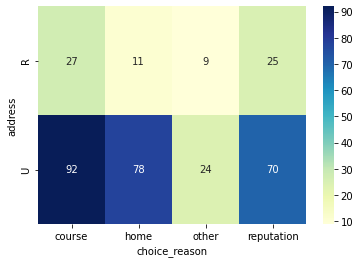

In [46]:
sns.heatmap(pd.crosstab(stud['address'], stud['choice_reason']), annot = True, cmap="YlGnBu")

# ▼
Интересно, ученики, живущие за городом, более ответственно подходят к выбору школы, для них важны программа и репутация школы.  И только на третьем месте стоит  критерий расстояния от дома

# ``famsize``
размер семьи('LE3' <= 3, 'GT3' >3)

In [47]:
stud.famsize = isNaN_column(stud.famsize)

 В столбце 24 пустых значений и 2 уникальных


array(['GT3', 'LE3', nan], dtype=object)

GT3    227
LE3    100
Name: famsize, dtype: int64

In [48]:
# заполняем пустые строки  новым значением('unknown')
stud.famsize = stud.famsize.fillna('unknown')

In [49]:
# Проверяем, остались ли пустые значения
stud.famsize.isna().sum()

0

In [50]:
stud.famsize = isNaN_column(stud.famsize)


 В столбце 0 пустых значений и 3 уникальных


array(['GT3', 'LE3', 'unknown'], dtype=object)

GT3        227
LE3        100
unknown     24
Name: famsize, dtype: int64

# ``parents_status``
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

<AxesSubplot:xlabel='parents_status', ylabel='famsize'>

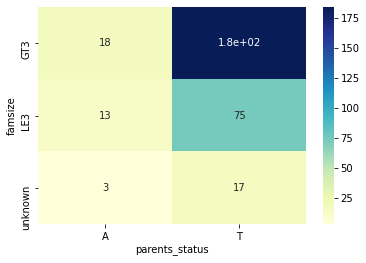

In [51]:
# Смотрим, как зависят famsize и parents_status
sns.heatmap(pd.crosstab(stud['famsize'], stud['parents_status']), annot = True, cmap="YlGnBu")

Большинство родителей, которые живут вместе, имеют также размер семьи больше трех человер 'GT3' >3. Поэтому заполняем пропуски в parents_status значениями из famsize, а затем переименовываем значения в колонке parents_status  
( 'LE3' => 'A' - раздельно, 'GT3' =>'T' - живут вместе)  

In [52]:
stud.parents_status = isNaN_column(stud.parents_status)

 В столбце 41 пустых значений и 2 уникальных


array(['A', 'T', nan], dtype=object)

T    276
A     34
Name: parents_status, dtype: int64

In [53]:
# заполняем пустые строки новым значением - из колонки "размер семьи" famsize
stud.parents_status = stud.apply(lambda x: x.famsize if pd.isna(x.parents_status) else x.parents_status, axis=1)

In [54]:
# переименовываем значения в колонке parents_status  
# ( 'LE3' => 'A' - раздельно, 'GT3' =>'T' - живут вместе) 
def rename_pstatus(s):
    if s == 'LE3':
        return 'A'
    elif s == 'GT3':
        return 'T'
    elif s == 'A':
        return 'A'
    elif s == 'T':
        return 'T'
    else:
        return 'unknown'

stud.parents_status = stud.parents_status.apply(rename_pstatus)

In [55]:
# Проверяем, остались ли пустые значения
stud.parents_status.isna().sum()

0

In [56]:
stud.parents_status = isNaN_column(stud.parents_status)

 В столбце 0 пустых значений и 3 уникальных


array(['A', 'T', 'unknown'], dtype=object)

T          301
A           46
unknown      4
Name: parents_status, dtype: int64

# ``schoolsup``
дополнительная образовательная поддержка (yes или no)

In [57]:
stud.schoolsup = isNaN_column(stud.schoolsup)

 В столбце 9 пустых значений и 2 уникальных


array(['no', 'yes', nan], dtype=object)

no     294
yes     48
Name: schoolsup, dtype: int64

In [58]:
# заполняем пустые строки  самым популярным значением('no')
stud.schoolsup = stud.schoolsup.fillna('no')

In [59]:
# Проверяем, остались ли пустые значения
stud.schoolsup.isna().sum()

0

In [60]:
stud.schoolsup = isNaN_column(stud.schoolsup)

 В столбце 0 пустых значений и 2 уникальных


array(['no', 'yes'], dtype=object)

no     303
yes     48
Name: schoolsup, dtype: int64

# ``famsup``
семейная образовательная поддержка (yes или no)

<AxesSubplot:xlabel='famsup', ylabel='schoolsup'>

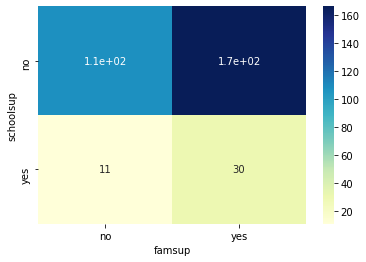

In [61]:
# Смотрим, как зависят schoolsup и famsup
sns.heatmap(pd.crosstab(stud['schoolsup'], stud['famsup']), annot = True, cmap="YlGnBu")

In [62]:
stud.famsup = isNaN_column(stud.famsup)

 В столбце 36 пустых значений и 2 уникальных


array(['no', 'yes', nan], dtype=object)

yes    196
no     119
Name: famsup, dtype: int64

In [63]:
# заполняем пустые строки новым значением - из колонки schoolsup
stud.famsup = stud.apply(lambda x: x.schoolsup if pd.isna(x.famsup) else x.famsup, axis=1)

In [64]:
# Проверяем, остались ли пустые значения
stud.famsup.isna().sum()

0

In [65]:
stud.famsup = isNaN_column(stud.famsup)

 В столбце 0 пустых значений и 2 уникальных


array(['no', 'yes'], dtype=object)

yes    203
no     148
Name: famsup, dtype: int64

# ``paid``
дополнительные платные занятия по математике (yes или no)

In [66]:
stud.paid = isNaN_column(stud.paid)

 В столбце 36 пустых значений и 2 уникальных


array(['no', 'yes', nan], dtype=object)

no     169
yes    146
Name: paid, dtype: int64

In [67]:
# заполняем пустые строки  новым значением('unknown')
stud.paid = stud.paid.fillna('unknown')

In [68]:
# Проверяем, остались ли пустые значения
stud.paid.isna().sum()

0

In [69]:
stud.paid = isNaN_column(stud.paid)

 В столбце 0 пустых значений и 3 уникальных


array(['no', 'unknown', 'yes'], dtype=object)

no         169
yes        146
unknown     36
Name: paid, dtype: int64

# ``activities``
дополнительные внеучебные занятия (yes или no)

In [70]:
stud.activities = isNaN_column(stud.activities)

 В столбце 12 пустых значений и 2 уникальных


array(['no', 'yes', nan], dtype=object)

yes    171
no     168
Name: activities, dtype: int64

<AxesSubplot:xlabel='go_out', ylabel='activities'>

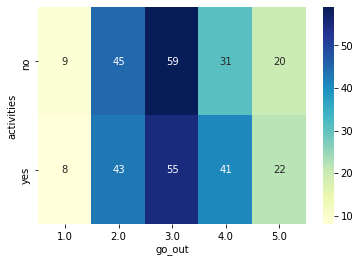

In [71]:
# Смотрим, как зависят activities и go_out
sns.heatmap(pd.crosstab(stud['activities'], stud['go_out']), annot = True, cmap="YlGnBu")

In [72]:
# не будем подставлять в activities значения go_out, заполняем пустые строки  новым значением('unknown')
stud.activities = stud.activities.fillna('unknown')

In [73]:
# Проверяем, остались ли пустые значения
stud.activities.isna().sum()

0

In [74]:
stud.activities = isNaN_column(stud.activities)

 В столбце 0 пустых значений и 3 уникальных


array(['no', 'unknown', 'yes'], dtype=object)

yes        171
no         168
unknown     12
Name: activities, dtype: int64

# ``nursery``
 посещал детский сад (yes или no)

In [75]:
stud.nursery = isNaN_column(stud.nursery)

 В столбце 12 пустых значений и 2 уникальных


array(['no', 'yes', nan], dtype=object)

yes    271
no      68
Name: nursery, dtype: int64

In [76]:
# заполняем пустые строки  самым популярным значением('yes')
stud.nursery = stud.nursery.fillna('yes')

In [77]:
# Проверяем, остались ли пустые значения
stud.nursery.isna().sum()

0

In [78]:
stud.nursery = isNaN_column(stud.nursery)

 В столбце 0 пустых значений и 2 уникальных


array(['no', 'yes'], dtype=object)

yes    283
no      68
Name: nursery, dtype: int64

# ``higher``
хочет получить высшее образование (yes или no)

In [79]:
stud.higher = isNaN_column(stud.higher)

 В столбце 19 пустых значений и 2 уникальных


array(['no', 'yes', nan], dtype=object)

yes    319
no      13
Name: higher, dtype: int64

In [80]:
# заполняем пустые строки  самым популярным значением('yes')
stud.higher = stud.higher.fillna('yes')

In [81]:
# Проверяем, остались ли пустые значения
stud.higher.isna().sum()

0

In [82]:
stud.higher = isNaN_column(stud.higher)

 В столбце 0 пустых значений и 2 уникальных


array(['no', 'yes'], dtype=object)

yes    338
no      13
Name: higher, dtype: int64

# ``internet``
наличие интернета дома (yes или no)

In [83]:
stud.internet = isNaN_column(stud.internet)

 В столбце 29 пустых значений и 2 уникальных


array(['no', 'yes', nan], dtype=object)

yes    273
no      49
Name: internet, dtype: int64

In [84]:
# заполняем пустые строки  самым популярным значением('yes'),
# а также, принимая во внимание, что интернет активно появляется даже там, где его не было
stud.internet = stud.internet.fillna('yes')

In [85]:
# Проверяем, остались ли пустые значения
stud.internet.isna().sum()

0

In [86]:
stud.internet = isNaN_column(stud.internet)

 В столбце 0 пустых значений и 2 уникальных


array(['no', 'yes'], dtype=object)

yes    302
no      49
Name: internet, dtype: int64

# ``romantic``
в романтических отношениях (yes или no)

In [87]:
stud.romantic = isNaN_column(stud.romantic)

 В столбце 29 пустых значений и 2 уникальных


array(['no', 'yes', nan], dtype=object)

no     218
yes    104
Name: romantic, dtype: int64

In [88]:
# заполняем пустые строки  новым значением('unknown')
stud.romantic = stud.romantic.fillna('unknown')

In [89]:
# Проверяем, остались ли пустые значения
stud.romantic.isna().sum()

0

In [90]:
stud.romantic = isNaN_column(stud.romantic)

 В столбце 0 пустых значений и 3 уникальных


array(['no', 'unknown', 'yes'], dtype=object)

no         218
yes        104
unknown     29
Name: romantic, dtype: int64

## Рассмотрим столбцы с ординальным (оценочным) типом данных


# ``mother_edu ``
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [91]:
# смотрим на значения
stud.mother_edu = isNaN_column(stud.mother_edu)

 В столбце 2 пустых значений и 5 уникальных


array([ 0.,  1.,  2.,  3.,  4., nan])

4.0    124
2.0     88
3.0     87
1.0     47
0.0      3
Name: mother_edu, dtype: int64

In [92]:
# заполняем пустые строки новым значением
stud.mother_edu = stud.mother_edu.fillna(stud.mother_edu.median())

# проверяем количество пустых строк
stud.mother_edu.isna().sum()

0

In [93]:
stud.mother_edu = isNaN_column(stud.mother_edu)

 В столбце 0 пустых значений и 5 уникальных


array([0., 1., 2., 3., 4.])

4.0    124
3.0     89
2.0     88
1.0     47
0.0      3
Name: mother_edu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0] Количество выбросов: 0.


<AxesSubplot:xlabel='mother_edu'>

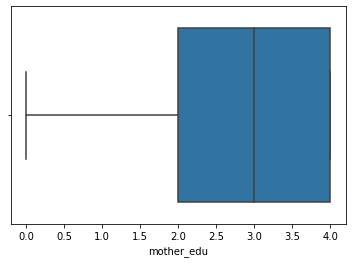

In [94]:
outliers_column(stud.mother_edu)
sns.boxplot(x='mother_edu', data = stud)

# ▼
Медиана сильно смещена вправо, значит мамы образованные. Данные ценные, так как мало пропусков 

# ``father_edu`` <a name="father_edu"></a>
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

 В столбце 21 пустых значений и 6 уникальных


array([ 0.,  1.,  2.,  3.,  4., 40., nan])

2.0     94
3.0     88
4.0     80
1.0     65
0.0      2
40.0     1
Name: father_edu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5] Количество выбросов: 3.


<AxesSubplot:xlabel='father_edu'>

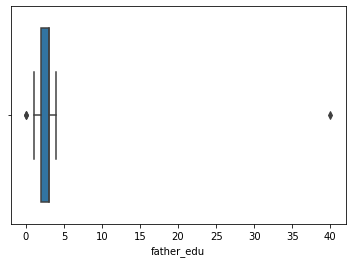

In [95]:
stud.father_edu = isNaN_column(stud.father_edu)
# Проверяем на выбросы
outliers_column(stud.father_edu)
sns.boxplot(x='father_edu', data = stud)

In [96]:
#Есть ошибка заполнения - указано значение 40. Вариант исправления - удалить или поменять на 4.0.
# исправляем ошибку ввода
stud.loc[stud.father_edu == 40.0, 'father_edu'] = 4.0

[Последующий анализ данных показал](#analyse_father_edu), что в среднем, у отца и матери ученика приблизительно похожий уровень образования, поэтому пропуски в образовании отца заменим на значения образования матери. Скорее всего, уровень образования родителей должен оказывать одинаковое влияние на успеваемость ученика.

Это тепловая карта предварительного анализа:


<AxesSubplot:xlabel='mother_edu', ylabel='father_edu'>

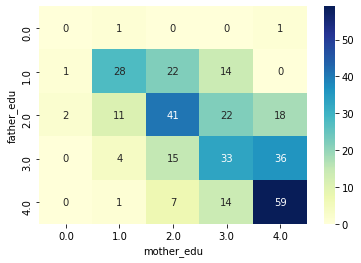

In [97]:
# Смотрим, как зависят father_edu и mother_edu
sns.heatmap(pd.crosstab(stud['father_edu'], stud['mother_edu']), annot = True, cmap="YlGnBu")

In [98]:
# Заполняем пустые строки образования отца новым значением - образование матери
stud.father_edu = stud.apply(lambda x: x.mother_edu if pd.isna(x.father_edu) else x.father_edu, axis=1)

In [99]:
stud.father_edu.describe()

count    351.000000
mean       2.584046
std        1.086634
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: father_edu, dtype: float64

 В столбце 0 пустых значений и 5 уникальных


array([0., 1., 2., 3., 4.])

2.0    97
3.0    94
4.0    91
1.0    67
0.0     2
Name: father_edu, dtype: int64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0] Количество выбросов: 0.


<AxesSubplot:xlabel='father_edu'>

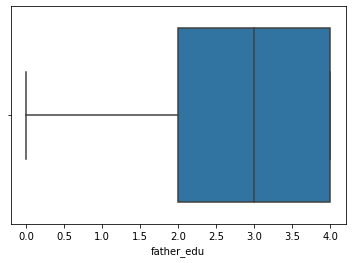

In [100]:
stud.father_edu = isNaN_column(stud.father_edu)
# Проверяем на выбросы
outliers_column(stud.father_edu)
sns.boxplot(x='father_edu', data = stud)


# ▼
В категориальных данных не будем избавляться от выбросов, кроме явных ошибочных значений

# ``mother_job``
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [101]:
stud.mother_job = isNaN_column(stud.mother_job)

 В столбце 17 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

other       115
services     90
teacher      51
at_home      49
health       29
Name: mother_job, dtype: int64

Пустые строки можно удалить, а можно заполнить либо самым популярным значением(), либо новым значением(например, 'unknown').

Выбран вариант - заполнить значением other.


In [102]:
# заполняем пустые строки новым значением
stud.mother_job = stud.mother_job.fillna('other')

In [103]:
stud.mother_job = isNaN_column(stud.mother_job)

 В столбце 0 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

other       132
services     90
teacher      51
at_home      49
health       29
Name: mother_job, dtype: int64

# ``father_job``
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

<AxesSubplot:xlabel='father_job', ylabel='mother_job'>

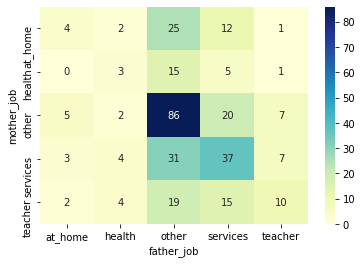

In [104]:
# Смотрим, как зависят mother_job и father_job
sns.heatmap(pd.crosstab(stud['mother_job'], stud['father_job']), annot = True, cmap="YlGnBu")

Профессии матери и отца никак не связаны друг с другом, моэтому будем заполнять пропуски значением other

In [105]:
stud.father_job = isNaN_column(stud.father_job)

 В столбце 31 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

other       176
services     89
teacher      26
health       15
at_home      14
Name: father_job, dtype: int64

In [106]:
# заполняем пустые строки новым значением
stud.father_job = stud.father_job.fillna('other')

In [107]:
stud.father_job = isNaN_column(stud.father_job)

 В столбце 0 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

other       207
services     89
teacher      26
health       15
at_home      14
Name: father_job, dtype: int64

# ``choice_reason``  
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое) <a name="choice_reason"></a>

In [108]:
stud.choice_reason = isNaN_column(stud.choice_reason)

 В столбце 15 пустых значений и 4 уникальных


array(['course', 'home', 'other', 'reputation', nan], dtype=object)

course        119
reputation     95
home           89
other          33
Name: choice_reason, dtype: int64

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('course'), либо новым значением(например, 'unknown').

Выбираем самое популярное значение, потому что на [теплограмме выше](#выбор_школы_адрес) мы видели, что этот параметр хорошо совпадает

In [109]:
# заполняем пустые строки  самым популярным значением('course'),
stud.choice_reason = stud.choice_reason.fillna('course')


In [110]:
# проверяем все исправления
stud.choice_reason = isNaN_column(stud.choice_reason)

 В столбце 0 пустых значений и 4 уникальных


array(['course', 'home', 'other', 'reputation'], dtype=object)

course        134
reputation     95
home           89
other          33
Name: choice_reason, dtype: int64

# ``guardian``
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [111]:
stud.guardian = isNaN_column(stud.guardian)

 В столбце 29 пустых значений и 3 уникальных


array(['father', 'mother', 'other', nan], dtype=object)

mother    224
father     78
other      20
Name: guardian, dtype: int64

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('mother'), либо  значением other.

Выбираем mother.

In [112]:
# заполняем пустые строки самым популярным значением mother
stud.guardian = stud.guardian.fillna('mother')

In [113]:
# проверяем все исправления
stud.guardian = isNaN_column(stud.guardian)

 В столбце 0 пустых значений и 3 уникальных


array(['father', 'mother', 'other'], dtype=object)

mother    253
father     78
other      20
Name: guardian, dtype: int64

# ``traveltime``
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

<AxesSubplot:xlabel='address', ylabel='traveltime'>

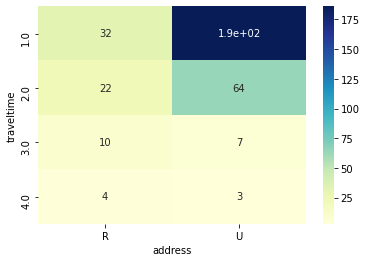

In [114]:
# Смотрим, как зависят traveltime и address
sns.heatmap(pd.crosstab(stud['traveltime'], stud['address']), annot = True, cmap="YlGnBu")

In [115]:
stud.traveltime = isNaN_column(stud.traveltime)

 В столбце 23 пустых значений и 4 уникальных


array([ 1.,  2.,  3.,  4., nan])

1.0    218
2.0     86
3.0     17
4.0      7
Name: traveltime, dtype: int64

Теплограмма показывает, что время пути до школы traveltime  сильно зависит от адреса address
Пустые ячейки traveltime можно заполнить значеними переменных из столбца address ('U' - городской, 'R' - за городом) после чего переименовать U => 1, R => 2, как наиболее часто встречающиеся


In [116]:
# traveltime
# заполняем пустые строки новым значением - из колонки address

stud.traveltime = stud.apply(lambda x: x.address if pd.isna(x.traveltime) else x.traveltime, axis=1)

In [117]:
# переименовываем значения в колонке traveltime 

def rename_traveltime(s):
    if s == 'U':
        return 1
    elif s == 'R':
        return 2
    elif s == 1:
        return 1
    elif s == 2:
        return 2
    elif s == 3:
        return 3    
    elif s == 4:
        return 4    
    else:
        return 'nan'

stud.traveltime = stud.traveltime.apply(rename_traveltime)

In [118]:
stud.traveltime = isNaN_column(stud.traveltime)

 В столбце 0 пустых значений и 4 уникальных


array([1, 2, 3, 4], dtype=int64)

1    236
2     91
3     17
4      7
Name: traveltime, dtype: int64

<AxesSubplot:xlabel='traveltime'>

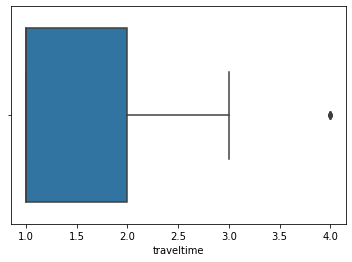

In [119]:
sns.boxplot(x='traveltime', data = stud)

C:\Users\mailf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5] Количество выбросов: 7.


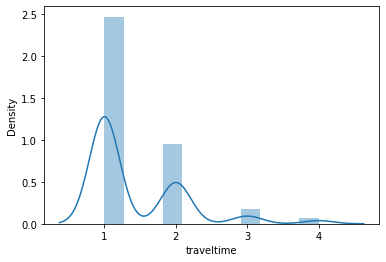

In [120]:
# Строим гистограмму
sns.distplot(stud.traveltime)
stud.traveltime.describe()
# Проверяем на выбросы, но оставляем их
outliers_column(stud.traveltime)

# ``studytime ``
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

<AxesSubplot:xlabel='schoolsup', ylabel='studytime'>

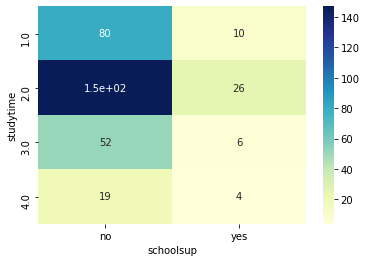

In [121]:
# Смотрим, как зависят studytime и schoolsup
sns.heatmap(pd.crosstab(stud['studytime'], stud['schoolsup']), annot = True, cmap="YlGnBu")

<AxesSubplot:xlabel='paid', ylabel='studytime'>

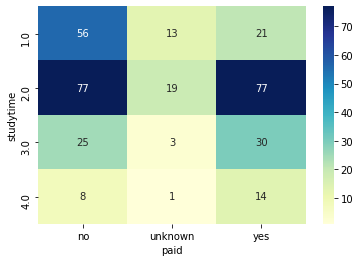

In [122]:
# Смотрим, как зависят studytime и paid
sns.heatmap(pd.crosstab(stud['studytime'], stud['paid']), annot = True, cmap="YlGnBu")

<AxesSubplot:xlabel='famsup', ylabel='studytime'>

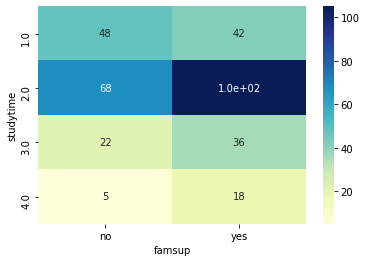

In [123]:
# Смотрим, как зависят studytime и famsup
sns.heatmap(pd.crosstab(stud['studytime'], stud['famsup']), annot = True, cmap="YlGnBu")

In [124]:
stud.studytime = isNaN_column(stud.studytime)

 В столбце 7 пустых значений и 4 уникальных


array([ 1.,  2.,  3.,  4., nan])

2.0    173
1.0     90
3.0     58
4.0     23
Name: studytime, dtype: int64

 # ▼
Отсутствие **дополнительной образовательной поддержки** и **платных занятий** умеренно увеличивают время на учебу помимо школы. 
А **семейная образовательная поддержка** напрямую увеличивает время занятий после школы, что вполне логично. 


Пустые строки можно удалить, а можно заполнить либо самым популярным значением('2.0'), либо медианой.

Выбираем последний вариант.

In [125]:
# заполняем пустые строки новым значением median
stud.studytime = stud.studytime.fillna(stud.studytime.median())

In [126]:
stud.studytime = isNaN_column(stud.studytime)

 В столбце 0 пустых значений и 4 уникальных


array([1., 2., 3., 4.])

2.0    180
1.0     90
3.0     58
4.0     23
Name: studytime, dtype: int64

<AxesSubplot:xlabel='studytime'>

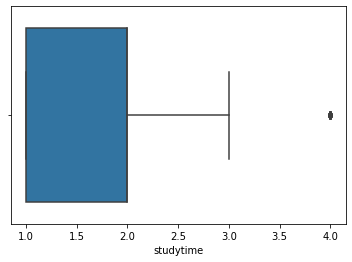

In [127]:
sns.boxplot(x='studytime', data = stud)

C:\Users\mailf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5] Количество выбросов: 23.


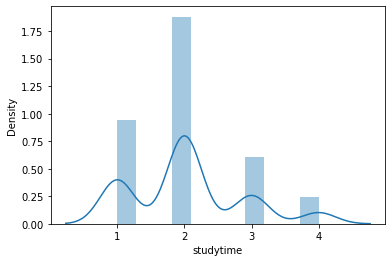

In [128]:
# Строим гистограмму
sns.distplot(stud.studytime)
stud.studytime.describe()
# Проверяем на выбросы
outliers_column(stud.studytime)

# ▼
Выбросов немало, но в категориальных данных мы решили не избавляться от выбросов, кроме явных ошибочных значений

# ``failures`` 
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [129]:
stud.failures = isNaN_column(stud.failures)

 В столбце 20 пустых значений и 4 уникальных


array([ 0.,  1.,  2.,  3., nan])

0.0    272
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

Пустые строки можно удалить, а можно заполнить либо самым популярным значением('0.0'), либо медианой.

Выбираем последний вариант.

In [130]:
# заполняем пустые строки новым значением
stud.failures = stud.failures.fillna(stud.failures.median())

In [131]:
stud.failures = isNaN_column(stud.failures)

 В столбце 0 пустых значений и 4 уникальных


array([0., 1., 2., 3.])

0.0    292
1.0     38
2.0     11
3.0     10
Name: failures, dtype: int64

C:\Users\mailf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    351.000000
mean       0.256410
std        0.652299
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

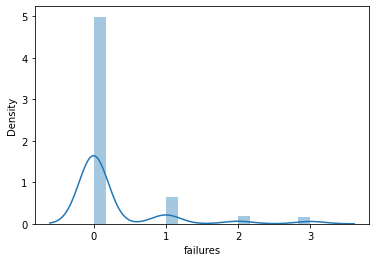

In [132]:
sns.distplot(stud.failures)
stud.failures.describe()

# ``fam_rel ``
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

<AxesSubplot:xlabel='mother_edu', ylabel='fam_rel'>

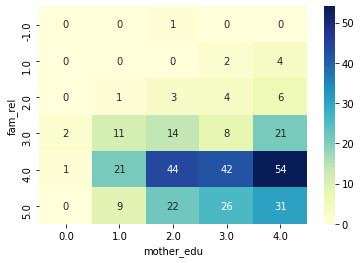

In [133]:
# Смотрим, как зависят fam_rel и mother_edu
sns.heatmap(pd.crosstab(stud['fam_rel'], stud['mother_edu']), annot = True, cmap="YlGnBu")

In [134]:
stud.fam_rel = isNaN_column(stud.fam_rel)

 В столбце 24 пустых значений и 6 уникальных


array([-1.,  1.,  2.,  3.,  4.,  5., nan])

 4.0    162
 5.0     88
 3.0     56
 2.0     14
 1.0      6
-1.0      1
Name: fam_rel, dtype: int64

Имеется очевидная ошибка - указано значение "-1".

Исправляем ошибку, меняя знак значения

Замечена более или менее значительная зависимость отношений в семье от образования матери, поэтому заполняем пустые значения колонки fam_rel (значения от 1 до 5)  новым значением - из колонки 'mother_edu'  (значения от 0 до 4), из-за разницы в оценочных значениях прибавляем к значению fam_rel единицу

In [135]:
stud.loc[stud.fam_rel == -1.0, 'fam_rel'] = 1.0

In [136]:
# заполняем пустые значения колонки fam_rel новым значением - из колонки 'mother_edu'  
stud.fam_rel = stud.apply(lambda x: x.mother_edu if pd.isna(x.fam_rel+1) else x.fam_rel, axis=1)

In [137]:
stud.fam_rel = isNaN_column(stud.fam_rel)

 В столбце 0 пустых значений и 5 уникальных


array([1., 2., 3., 4., 5.])

4.0    170
5.0     88
3.0     63
2.0     18
1.0     12
Name: fam_rel, dtype: int64

In [138]:
# Проверяем на выбросы
outliers_column(stud.fam_rel)

25-й перцентиль: 3.0, 75-й перцентиль: 4.5, IQR: 1.5,  Границы выбросов: [0.75, 6.75] Количество выбросов: 0.


<AxesSubplot:>

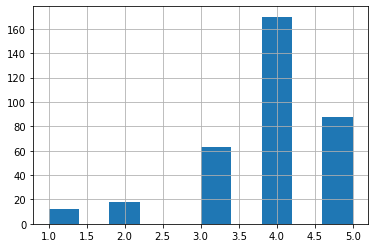

In [139]:
stud.fam_rel.hist()

In [140]:
# проверяем размеры датасета
stud.shape

(351, 29)

# ``freetime``
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [141]:
stud.freetime = isNaN_column(stud.freetime)


 В столбце 8 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

3.0    132
4.0    102
2.0     58
5.0     35
1.0     16
Name: freetime, dtype: int64

<AxesSubplot:xlabel='traveltime', ylabel='freetime'>

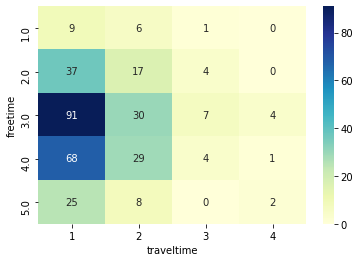

In [142]:
# Смотрим, как зависят freetime и studytime
sns.heatmap(pd.crosstab(stud['freetime'], stud['traveltime']), annot = True, cmap="YlGnBu")

In [143]:
outliers_column(stud.freetime)

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5] Количество выбросов: 16.


In [144]:
# Предпочтительнее заполнять пробелы медианным значением 
stud.freetime = stud.freetime.fillna(stud.freetime.median())

<AxesSubplot:xlabel='freetime'>

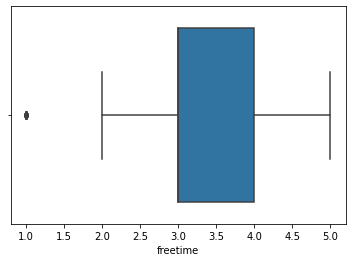

In [145]:
sns.boxplot(x='freetime', data = stud)

<AxesSubplot:>

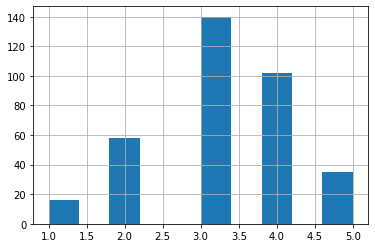

In [146]:
stud.freetime.hist()

In [147]:
# проверяем пустые строки
stud.freetime = isNaN_column(stud.freetime)

 В столбце 0 пустых значений и 5 уникальных


array([1., 2., 3., 4., 5.])

3.0    140
4.0    102
2.0     58
5.0     35
1.0     16
Name: freetime, dtype: int64

# ``go_out ``
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [148]:
stud.go_out = isNaN_column(stud.go_out)

 В столбце 6 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

3.0    118
2.0     91
4.0     74
5.0     43
1.0     19
Name: go_out, dtype: int64

<AxesSubplot:xlabel='go_out', ylabel='freetime'>

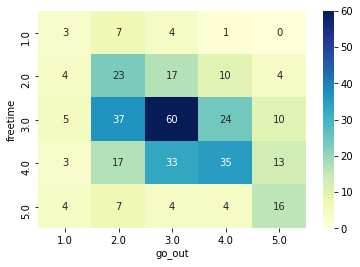

In [149]:
# Смотрим, как зависят freetime и go_out
sns.heatmap(pd.crosstab(stud['freetime'], stud['go_out']), annot = True, cmap="YlGnBu")

In [150]:
outliers_column(stud.go_out)

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0] Количество выбросов: 0.


In [151]:
# заполняем пробелы новым значением, медианой
stud.go_out = stud.go_out.fillna(stud.go_out.median())

C:\Users\mailf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='go_out', ylabel='Density'>

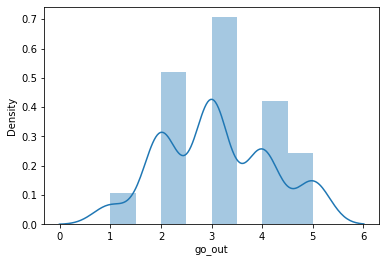

In [152]:
sns.distplot(stud.go_out)


In [153]:
# проверяем пустые строки
stud.go_out = isNaN_column(stud.go_out)

 В столбце 0 пустых значений и 5 уникальных


array([1., 2., 3., 4., 5.])

3.0    124
2.0     91
4.0     74
5.0     43
1.0     19
Name: go_out, dtype: int64

# ``health``
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

<AxesSubplot:xlabel='absences', ylabel='health'>

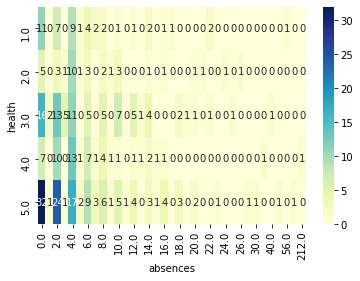

In [154]:
# Смотрим, как зависят health и absences
sns.heatmap(pd.crosstab(stud['health'], stud['absences']), annot = True, cmap="YlGnBu")

In [155]:
stud.health = isNaN_column(stud.health)


 В столбце 13 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

5.0    124
3.0     81
4.0     53
1.0     45
2.0     35
Name: health, dtype: int64

In [156]:
outliers_column(stud.health)

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0] Количество выбросов: 0.


In [157]:
# заполняем пробелы новым значением, наиболее часто встречающимся
stud.health = stud.health.fillna(5.0)

<AxesSubplot:xlabel='health'>

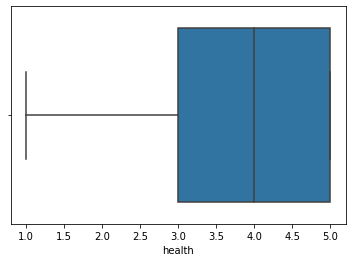

In [158]:
sns.boxplot(x='health', data = stud)

C:\Users\mailf\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='health', ylabel='Density'>

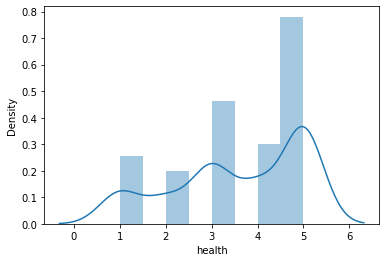

In [159]:
sns.distplot(stud.health)

In [160]:
# проверяем пустые строки
stud.health = isNaN_column(stud.health)

 В столбце 0 пустых значений и 5 уникальных


array([1., 2., 3., 4., 5.])

5.0    137
3.0     81
4.0     53
1.0     45
2.0     35
Name: health, dtype: int64

# 5. EDA

Exploratory Data Analysis - анализ данных. На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками. Цель этого этапа - понять, что эти данные могут нам дать, и как признаки могут быть взаимосвязаны между собой.

## Корреляционный анализ

Выясним, какие столбцы коррелируют с score. 

Корреляции рассмотрим только для столбцов с численными переменными.

Это поможет понять, какие параметры стоит оставить для построения модели, а какие — исключить.


Так как уникальных значений в столбцах мало (кроме  **absences** ), не делаем выборку, а берем в рассмотрение все данные

(12.5, -0.5)

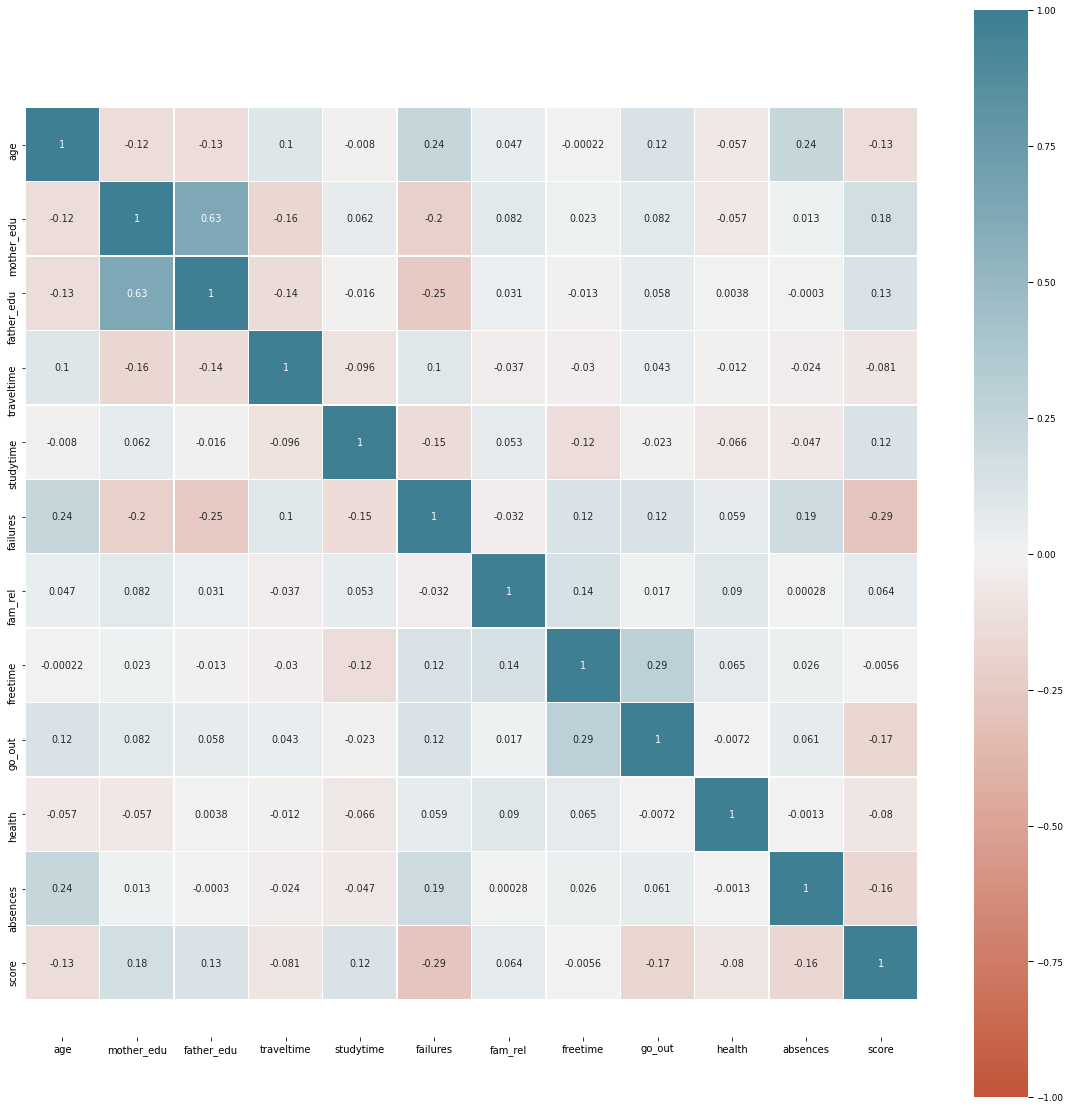

In [161]:
# Построим тепловую карту
fig, ax = plt.subplots(figsize=(20,20))

sns.set_context('paper')
sns.heatmap(
    stud.corr(),
    annot = True,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    linewidths=.5,
    square=True)

# исправление отображения heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


# ▼

<a name="analyse_father_edu"></a>
В среднем, у отца и матери учищегося приблизительно похожий уровень образования, поэтому пропуски в образовании отца заменим на значения образования матери. Скорее всего, уровень образования родителей должен оказывать одинаковое влияние на успеваемость ученика.
Вернемся к переменной [father_edu](#father_edu) и проделаем заново операцию замены пропусков (с перезапуском Kernel)

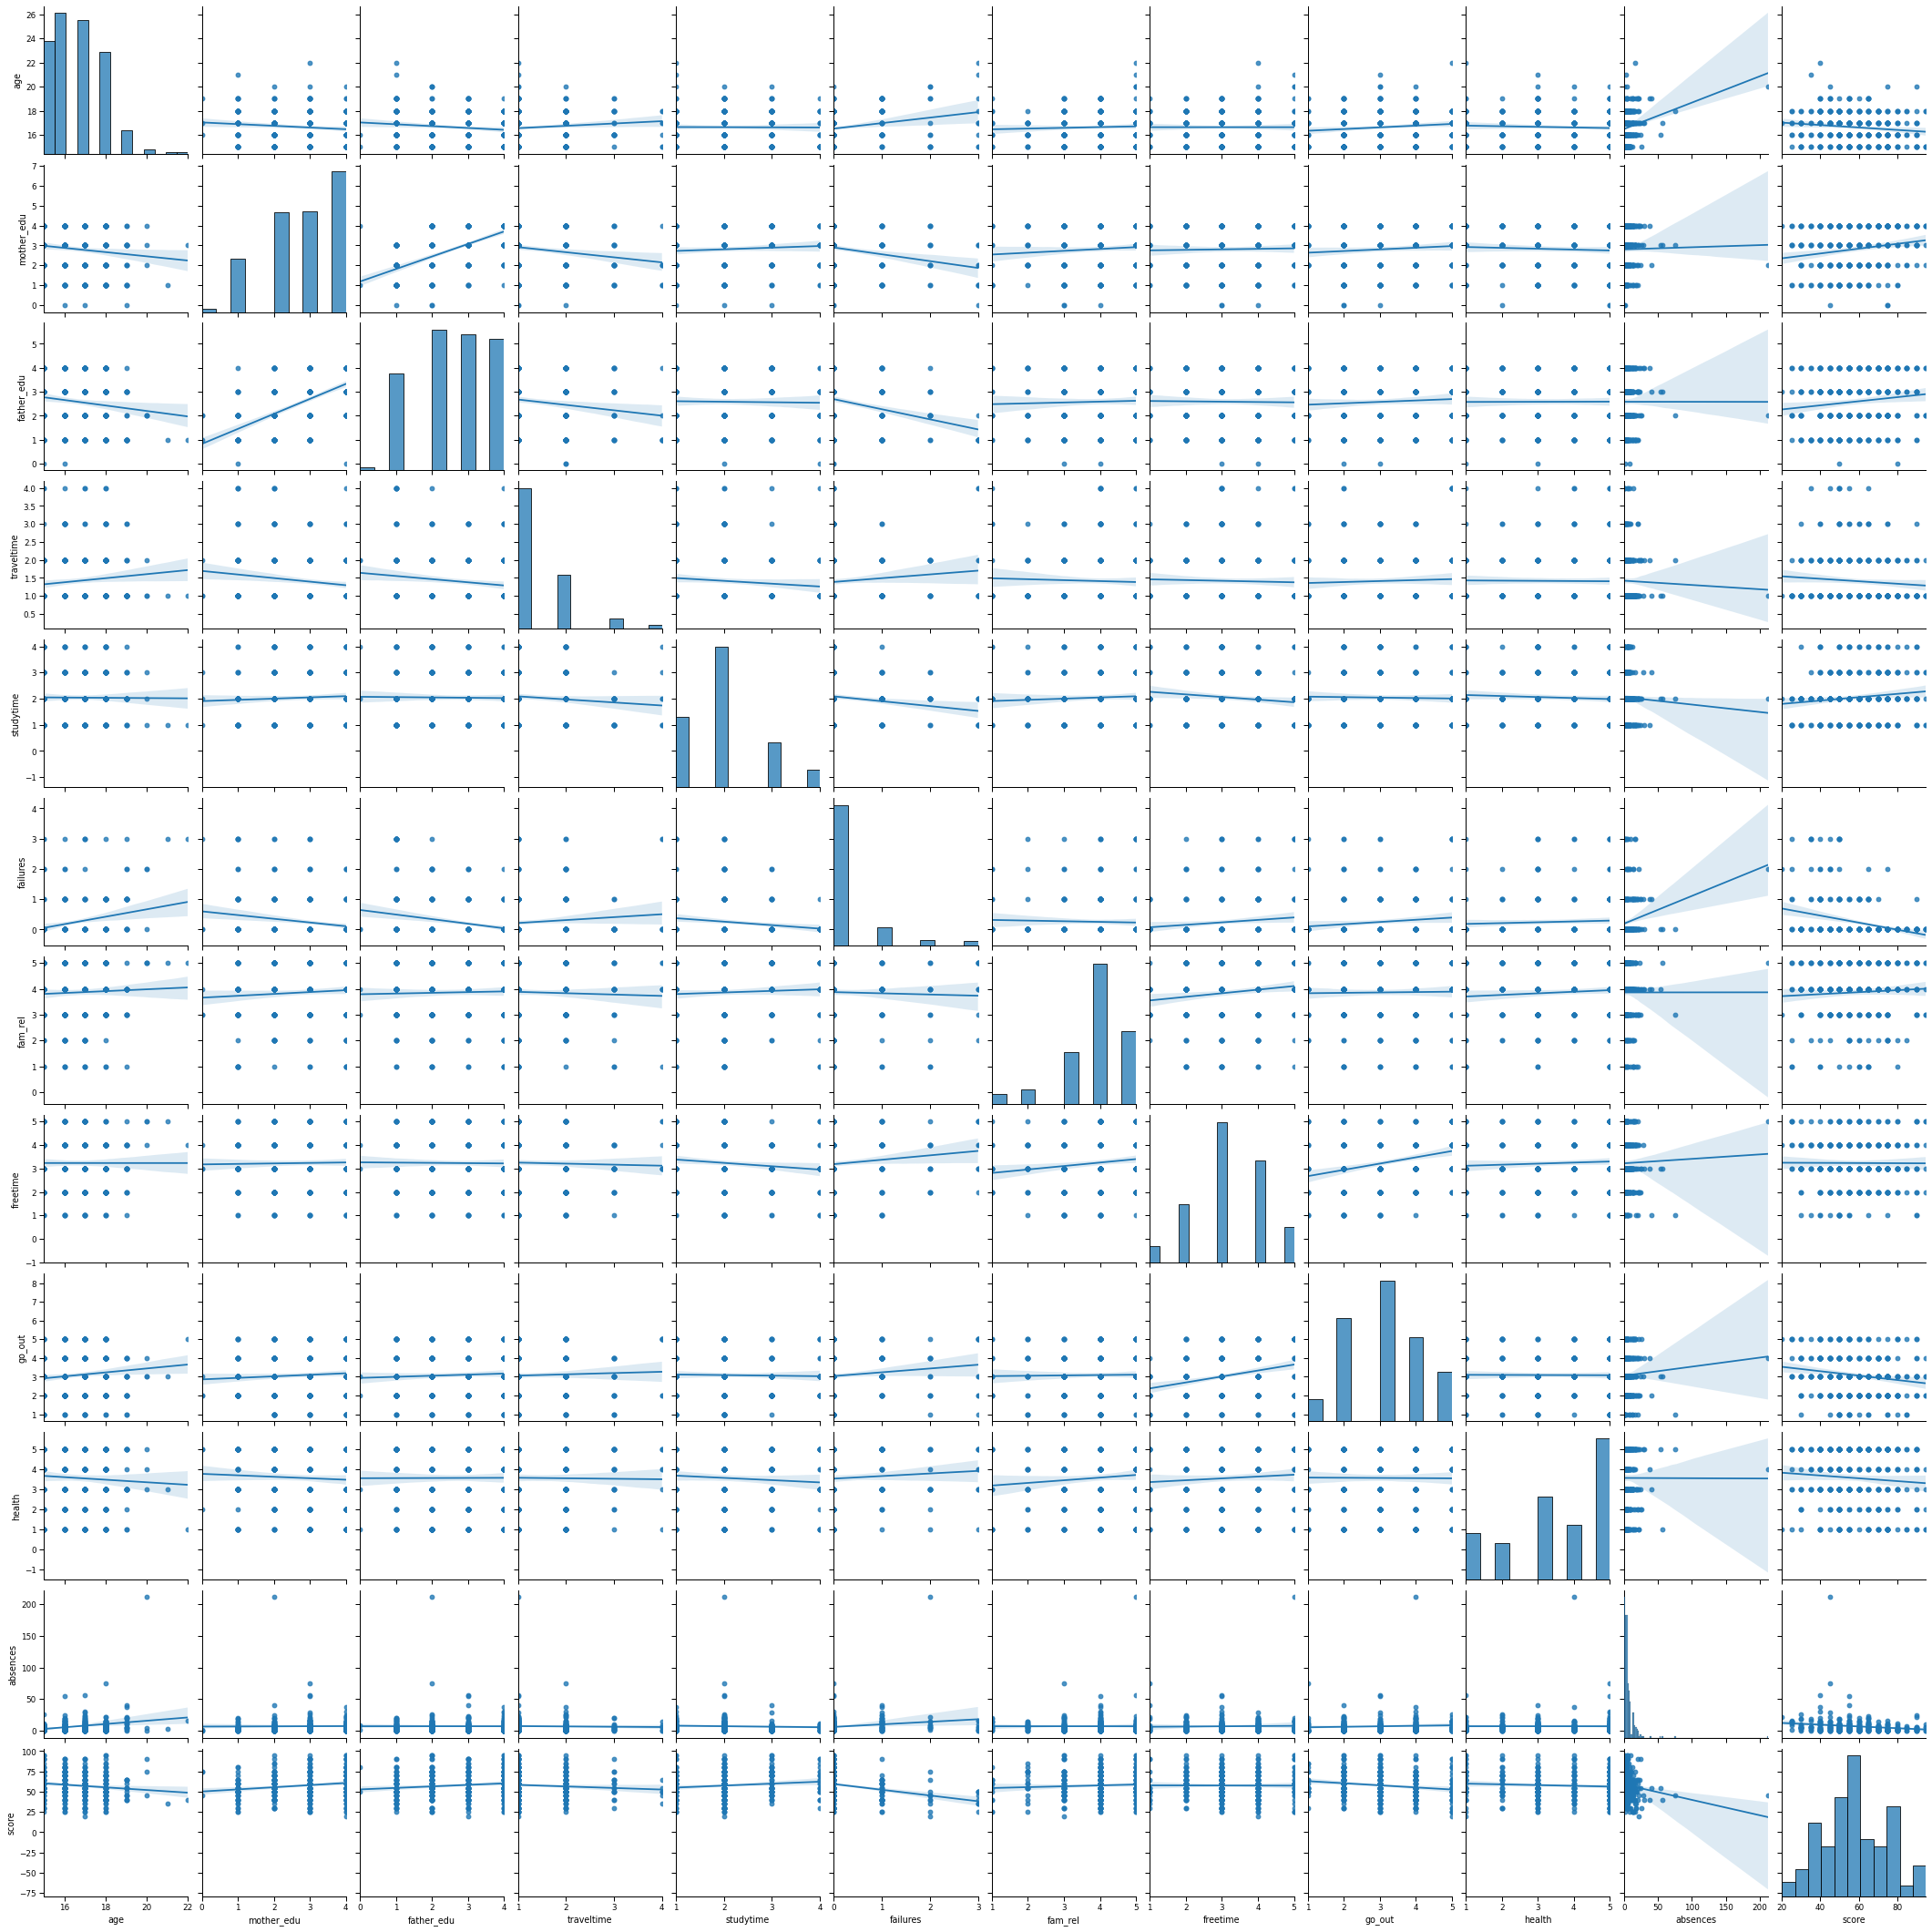

In [174]:
# %%script false
sns.pairplot(stud, kind = 'reg')

In [175]:
# Используем для наглядности матрицу корреляций для числовых столбцов:
#stud.corr()
corr = stud.corr()
corr[(0.1 < corr) & (1 > corr)]

,age,mother_edu,father_edu,traveltime,studytime,failures,fam_rel,freetime,go_out,health,absences,score
age,NaN,NaN,NaN,0.104586,NaN,0.236261,NaN,NaN,0.122373,NaN,0.238489,NaN
mother_edu,NaN,NaN,0.626313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.178446
father_edu,NaN,0.626313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.125980
traveltime,0.104586,NaN,NaN,NaN,NaN,0.100430,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.124301
failures,0.236261,NaN,NaN,0.100430,NaN,NaN,NaN,0.123444,0.121577,NaN,0.192408,NaN
fam_rel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143385,NaN,NaN,NaN,NaN
freetime,NaN,NaN,NaN,NaN,NaN,0.123444,0.143385,NaN,0.291806,NaN,NaN,NaN
go_out,0.122373,NaN,NaN,NaN,NaN,0.121577,NaN,0.291806,NaN,NaN,NaN,NaN
health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы видим в числовых столбцах, что оценка по математике зависит в первую очередь от образования матери, немного меньше - от образования отца, а также от времени занятий после школы. 

## Анализ всех переменных
Посмотрим различаются ли распределения в зависимости от значения переменных.

Целевая переменная **score**

Переменные, которые будем рассматривать:
- 13 бинарных: sex, school, address, famsize, parents_status, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, 
- 13 ординальных: mother_edu, father_edu, mother_job, father_job, choice_reason, guardian, traveltime, studytime, failures, fam_rel, freetime, go_out, health
- 2 оставшихся численных: age, absences

Для удобства составим списки этих критериев. 

In [164]:
list_of_rating_columns = ('mother_edu', 'father_edu', 'mother_job', 'father_job',
                            'choice_reason', 'guardian', 'traveltime', 'studytime',
                            'failures', 'fam_rel', 'freetime', 'go_out', 'health')
list_of_binary_columns = ('sex', 'school', 'address', 'famsize', 'parents_status', 'schoolsup', 'famsup', 
                          'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic')
list_of_number_columns = ('age', 'absences')
list_of_all_columns=[]
list_of_all_columns.extend(list_of_binary_columns)
list_of_all_columns.extend(list_of_rating_columns)
list_of_all_columns.extend(list_of_number_columns)


In [165]:
list_of_all_columns

['sex',
 'school',
 'address',
 'famsize',
 'parents_status',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'mother_edu',
 'father_edu',
 'mother_job',
 'father_job',
 'choice_reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'fam_rel',
 'freetime',
 'go_out',
 'health',
 'age',
 'absences']

In [166]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

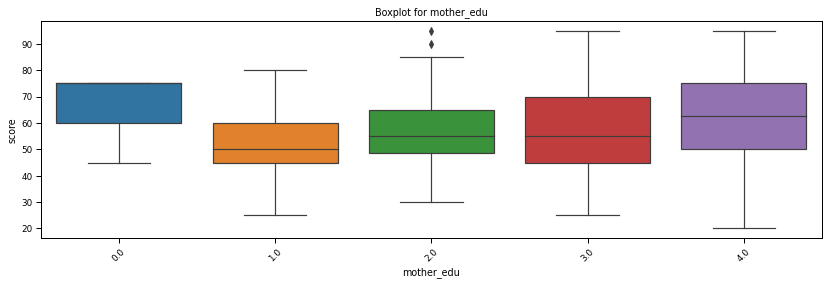

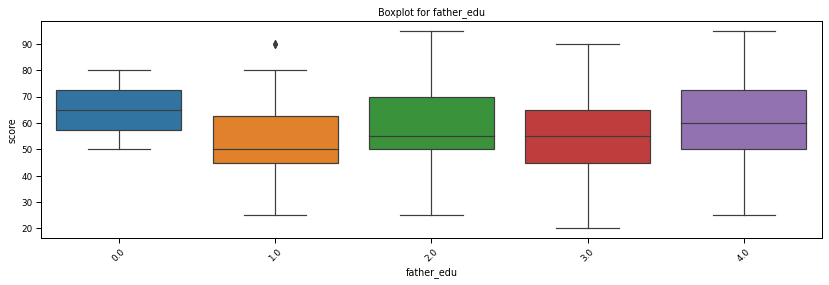

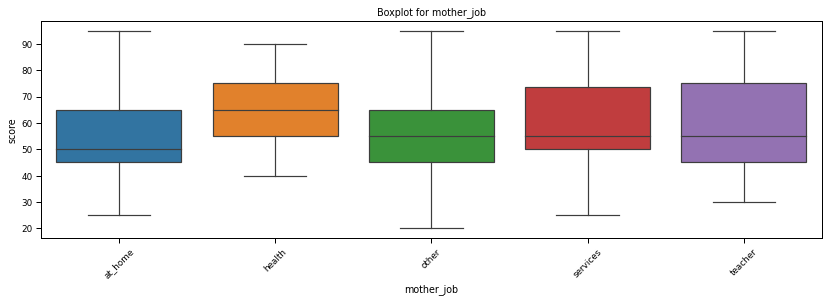

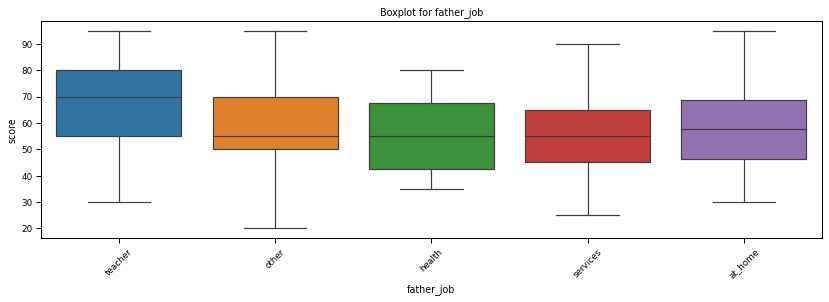

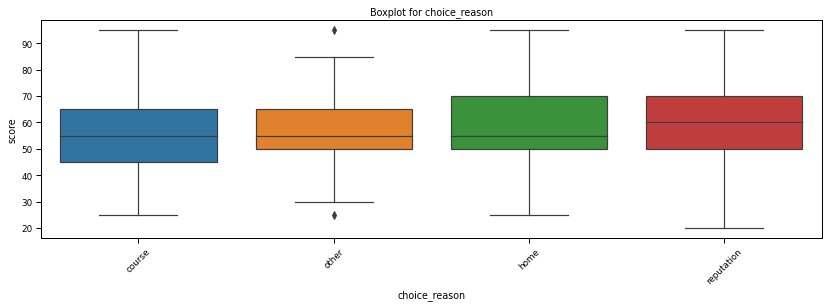

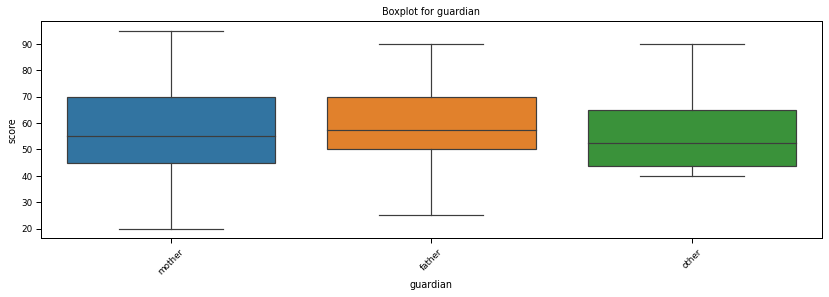

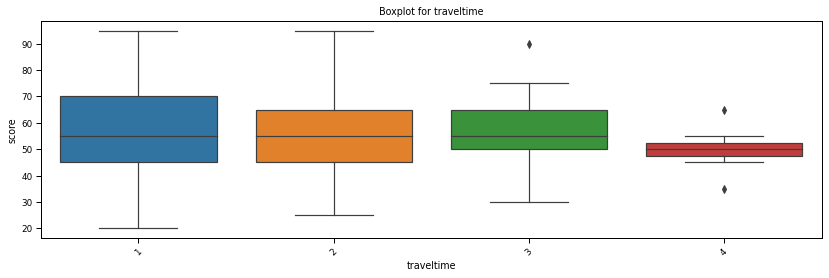

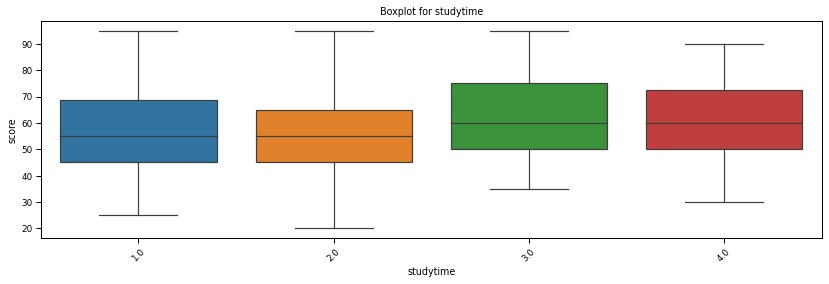

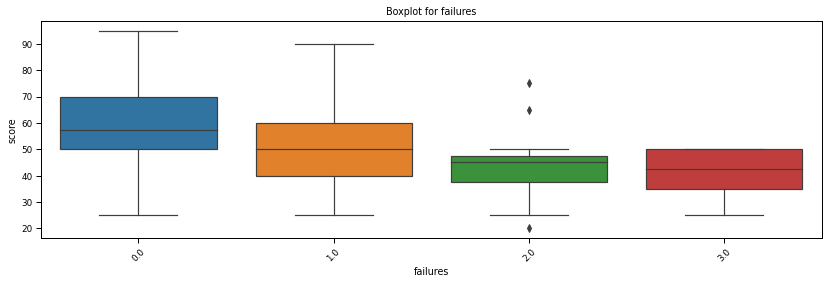

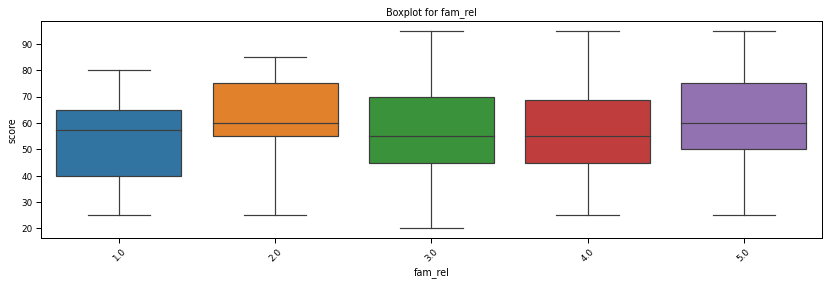

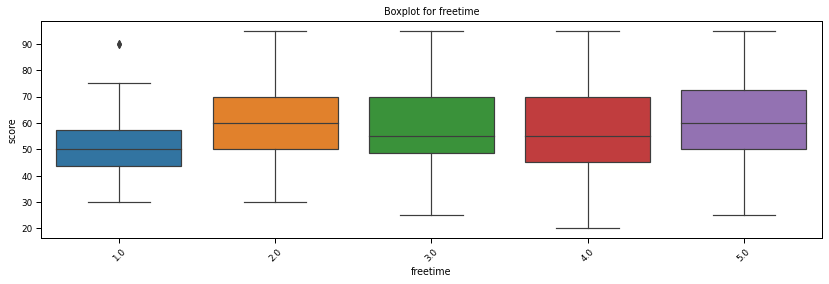

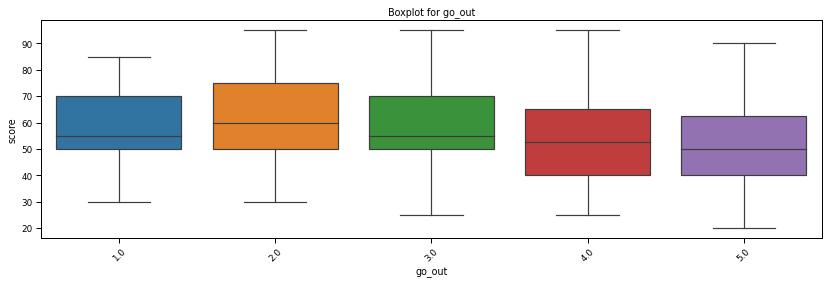

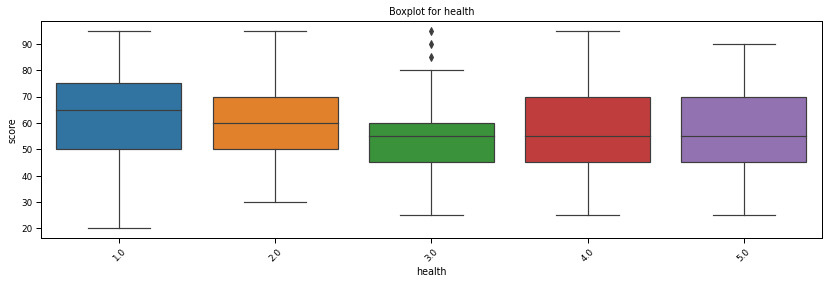

In [167]:
for col in list_of_rating_columns:
    get_boxplot(col)

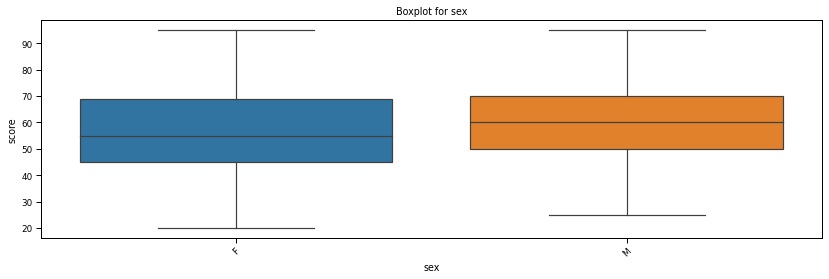

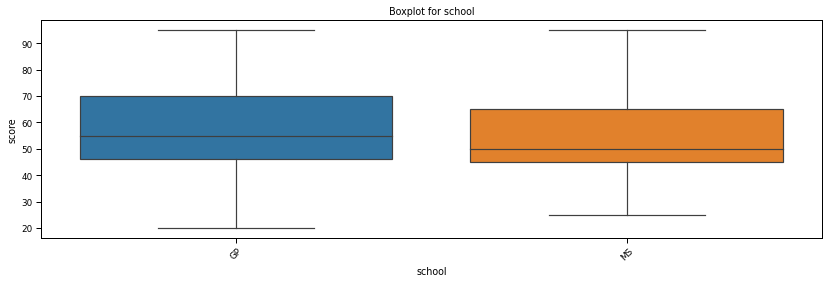

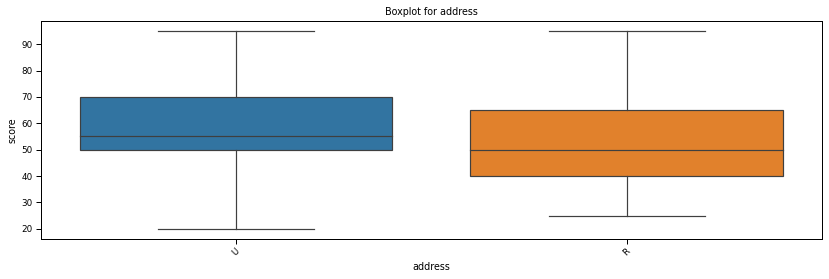

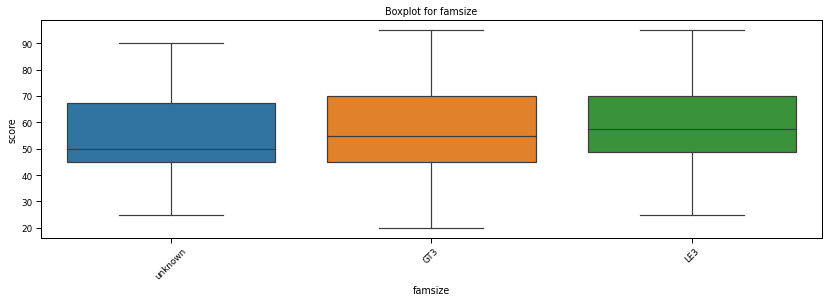

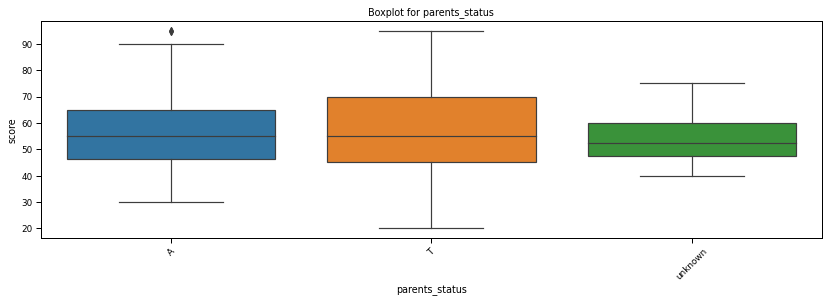

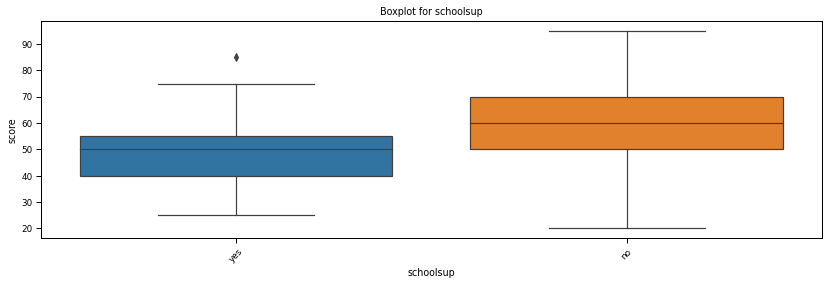

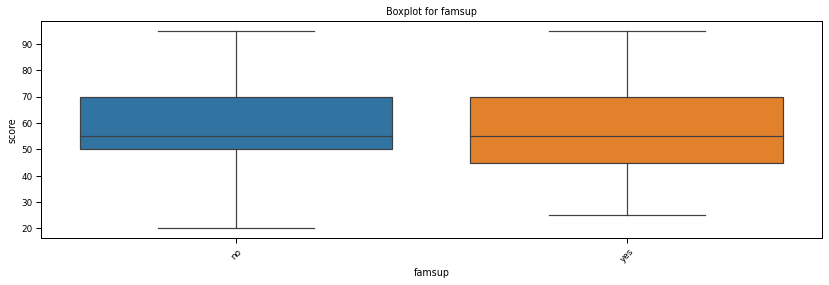

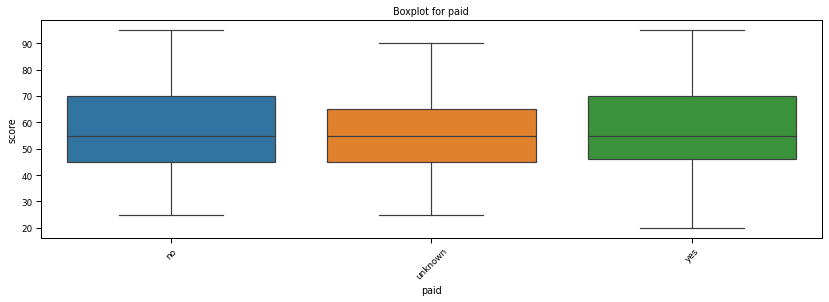

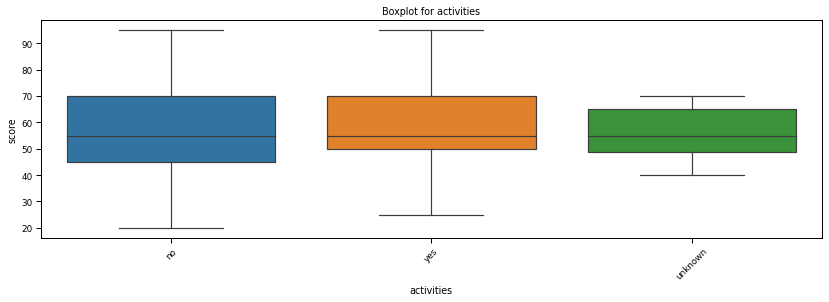

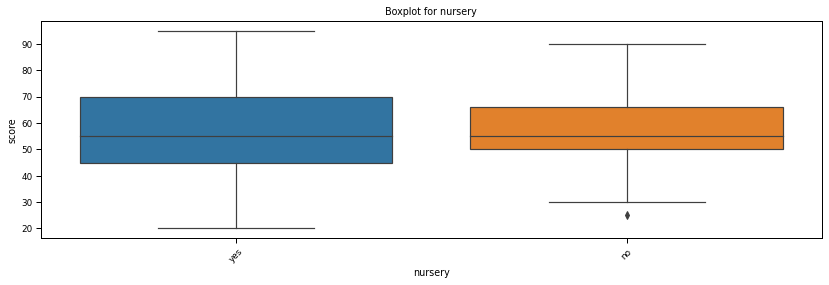

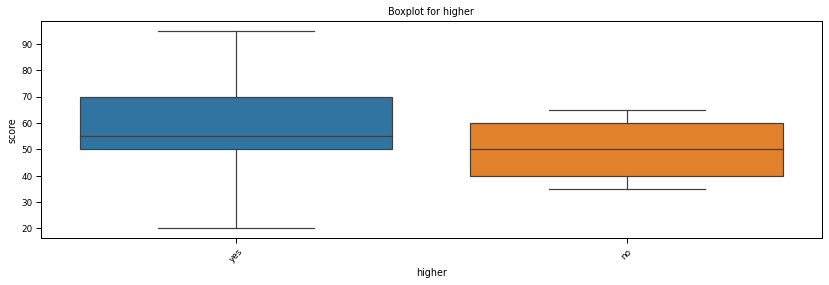

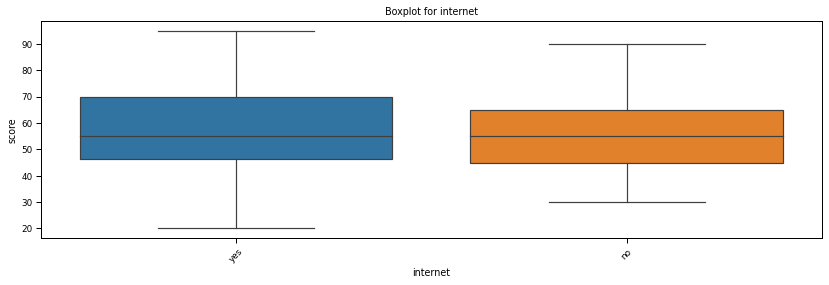

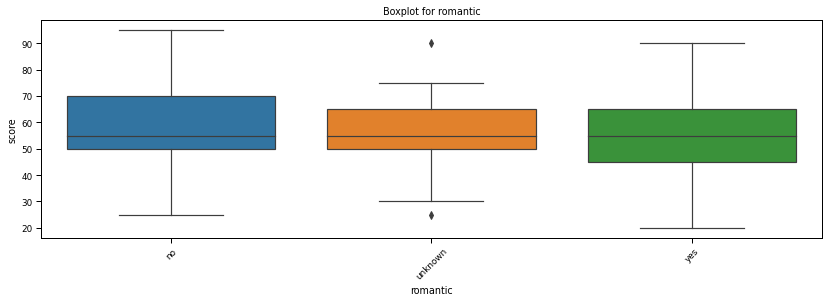

In [168]:
for col in list_of_binary_columns:
    get_boxplot(col)

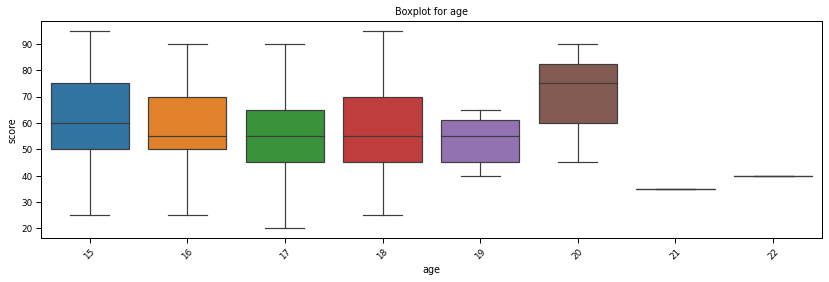

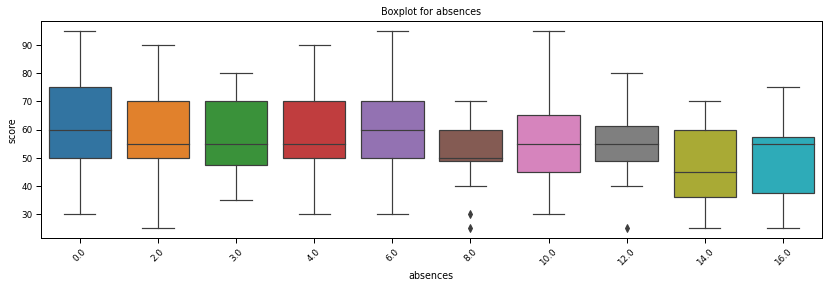

In [169]:
for col in list_of_number_columns:
    get_boxplot(col)

# Тест Стьюдента по классификационным и оценочным признакам
По графикам похоже, что многие параметры могут влиять на оценку по математике. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок по математике по различным параметрам неразличимы:

In [170]:
list_of_all_columns
                     

['sex',
 'school',
 'address',
 'famsize',
 'parents_status',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'mother_edu',
 'father_edu',
 'mother_job',
 'father_job',
 'choice_reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'fam_rel',
 'freetime',
 'go_out',
 'health',
 'age',
 'absences']

In [171]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'].dropna(),
                          stud.loc[stud.loc[:, column] == comb[1], 'score'].dropna()).pvalue
#         print(f"для столбца {column} ttest:= {ttest}")
#         print(f"                     comb:= {combinations_all}")
        if  ttest<= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('!!!Найдены статистически значимые различия для колонки', column)
            break

In [172]:
for elem in list_of_all_columns:
    get_stat_dif(elem)

!!!Найдены статистически значимые различия для колонки address
!!!Найдены статистически значимые различия для колонки schoolsup
!!!Найдены статистически значимые различия для колонки mother_edu
!!!Найдены статистически значимые различия для колонки father_edu
!!!Найдены статистически значимые различия для колонки father_job
!!!Найдены статистически значимые различия для колонки studytime
!!!Найдены статистически значимые различия для колонки failures
!!!Найдены статистически значимые различия для колонки go_out


C:\Users\mailf\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\mailf\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\mailf\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\mailf\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\mailf\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\mailf\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\mailf\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWar

In [177]:
stud_for_model = stud.loc[:, ['address',  'schoolsup', 'mother_edu', 'father_edu', 'father_job', 'studytime', 'failures', 'go_out']]
stud_for_model.head()

,address,schoolsup,mother_edu,father_edu,father_job,studytime,failures,go_out
0,U,yes,4.0,4.0,teacher,2.0,0.0,4.0
1,U,no,1.0,1.0,other,2.0,0.0,3.0
2,U,yes,1.0,1.0,other,2.0,3.0,2.0
3,U,no,4.0,2.0,other,3.0,0.0,2.0
4,U,no,3.0,3.0,other,2.0,0.0,2.0


Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае 8 важных переменных, которые, возможно, оказывают влияние на оценку, это: address, schoolsup, mother_edu, father_edu, father_job,	studytime, failures, go_out

# 6. Выводы
Итак, в результате EDA для анализа влияния параметров на оценку по математике оставляем 8 важных переменных, которые, возможно, оказывают влияние на оценку, это: **address, schoolsup, mother_edu, father_edu, father_job,	studytime, failures, go_out**

В данных было около 11% пропущенных значений.  В основном, строки с пропущенными данными не удалялись, большинство удалось заполнить либо значением из столбца, либо значениями из другого столбца, с которым была найдена корреляция. В некоторых столбцах пришлось добавить новый признак. Были удалены лишь строки, не содержащие данных об оценке по математике. 

В категориальных данных не избавлялись от выбросов, кроме явных ошибочных значений. 

### Любопытные выводы

Дети у малообразованных родителей тратят меньше времени на дорогу, возможно потому что те живут часто в сельской местности  и дети вынуждены покидать отчий дом и жить в общежитии рядом со школой? 

Уровень образования у родителей часто совпадает, но в большей степени влияние на оценку по математике оказывает уровень образования матери.

Депрессивные ученики, считающие себя неудачниками, учатся хуже и чаще пропускают школу. В основном, неудачники живут в малообразованных семьях, особенно тяжело переживают дети низкий уровень образования отца.

Те, кто пропускает много занятий и проводит много времени с друзьями, имеют оценку ниже (какая неожиданность 😉).

Городские дети и мальчики имеют более высокую оценку по математике, чем из селяне и девочки.

И наконец, дополнительная образовательная поддержка очень важна для конечного результата. 

Примечание: после обновления Jupyter Notebook появились угрожающие розовые объявления о скором изъятии используемой функции из следующих версий программы, но переделывать уже было поздно.  
